In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from matplotlib import pyplot as plt
 
file_path= '门店销量预测数据.xlsx'
df = pd.read_excel(file_path,parse_dates=[1])

In [2]:
set(df['门店编号'].values)

{'NM000019', 'NM000021', 'NM000023', 'NM000043'}

In [3]:
df.columns

Index(['门店编号', '日期', '总销售额', '销售量', '客单价'], dtype='object')

In [4]:
nm19=df.loc[df['门店编号']=='NM000019']
nm21=df.loc[df['门店编号']=='NM000021']
nm23=df.loc[df['门店编号']=='NM000023']
nm43=df.loc[df['门店编号']=='NM000043']
NM=[nm19,nm21,nm23]

In [4]:
NM19=nm19.loc[:,['日期','总销售额']]
NM19.columns=['ds','y']

In [5]:
NM19.head()

,ds,y
0,2018-05-27,31095.6
1,2018-07-09,15910.8
2,2018-04-05,39326.6
3,2018-07-20,19379.3
4,2018-04-16,12288.4


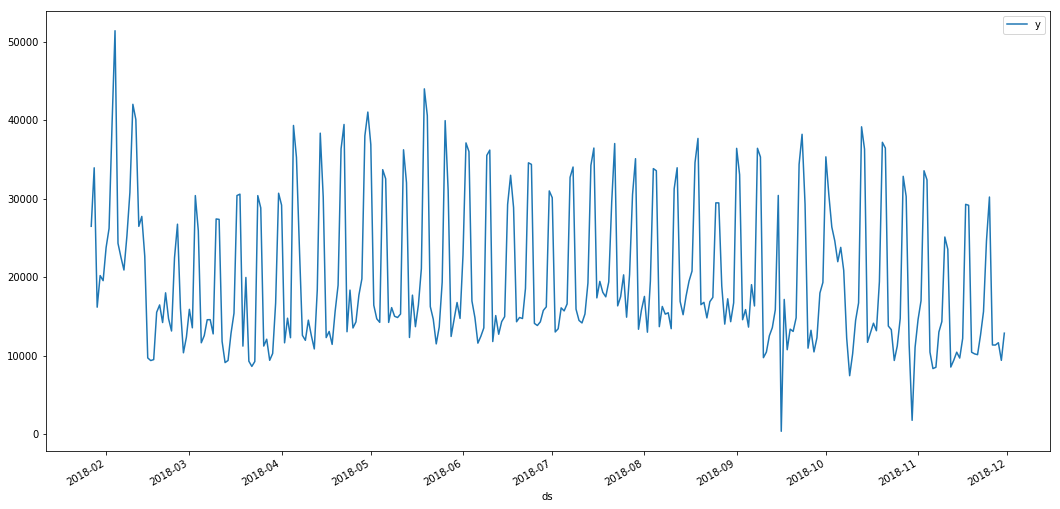

In [6]:
NM19.plot(x='ds',y='y',figsize=(18,9))

In [7]:
holiday=pd.read_excel('2018.xls',sheet_name='Sheet2',parse_dates=[1],usecols=[1,2])
holiday

,ds,holiday
0,2018-02-15,new_year
1,2018-02-16,new_year
2,2018-02-17,new_year
3,2018-02-18,new_year
4,2018-02-19,new_year
5,2018-02-20,new_year
6,2018-02-21,new_year
7,2018-04-05,qing_ming
8,2018-04-06,qing_ming
9,2018-04-07,qing_ming


In [18]:
NM19.sort_values('ds')[:-15]

,ds,y
153,2018-01-27,26473.9
285,2018-01-28,33929.3
235,2018-01-29,16162.3
294,2018-01-30,20193.7
162,2018-01-31,19545.8
191,2018-02-01,23763.1
128,2018-02-02,26211.5
155,2018-02-03,39462.8
36,2018-02-04,51402.5
16,2018-02-05,24302.9


In [33]:
m=Prophet(holidays=holiday)
m.fit(NM19.sort_values('ds')[:-15])
future=m.make_future_dataframe(periods=15)
future.tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
303,2018-11-26
304,2018-11-27
305,2018-11-28
306,2018-11-29
307,2018-11-30


In [31]:
forecast=m.predict(future)
predict=forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(15)

In [32]:
predict.to_excel('predict.xls')

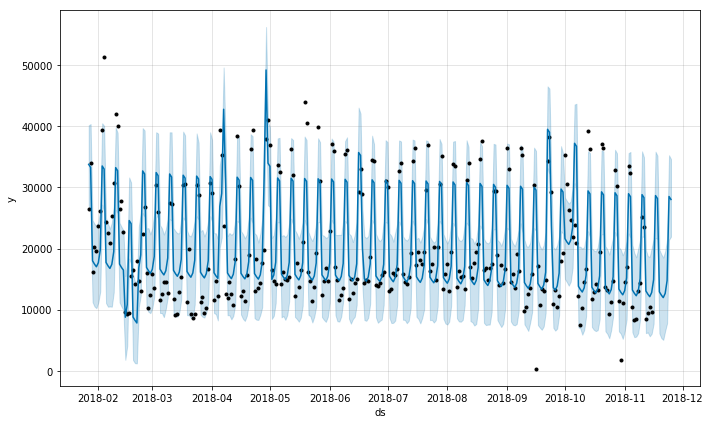

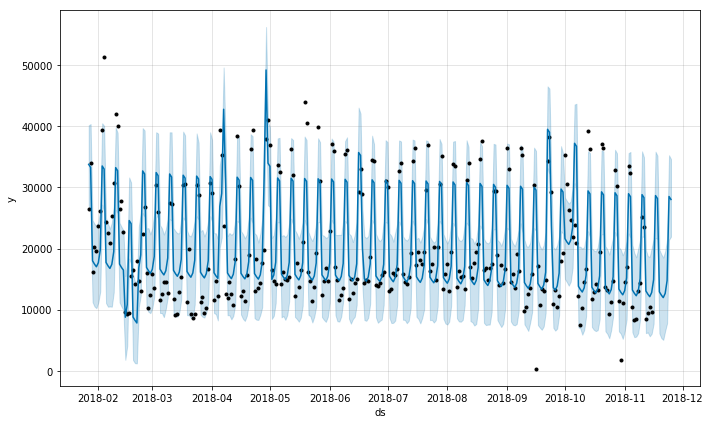

In [25]:
m.plot(forecast)

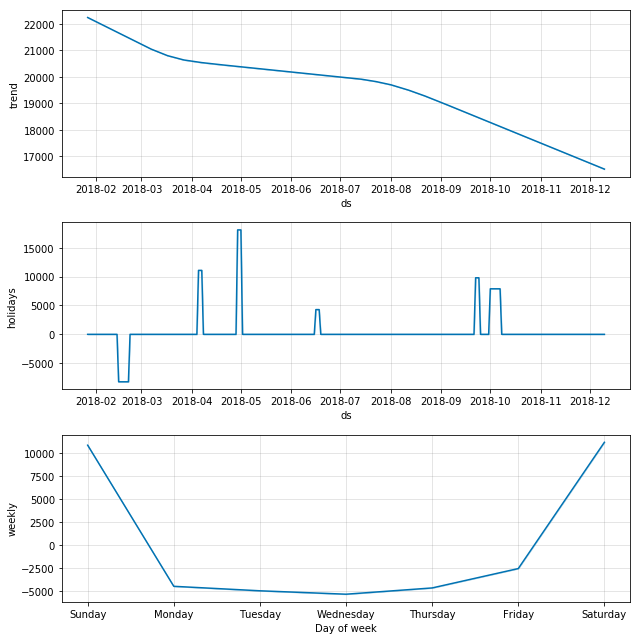

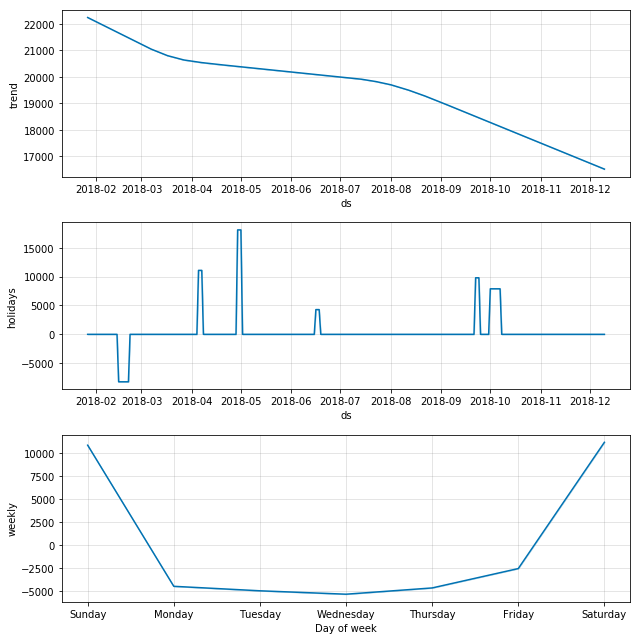

In [12]:
m.plot_components(forecast)

In [34]:
m=Prophet(holidays=holiday)
m.fit(NM19.sort_values('ds'))
future=m.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
313,2018-12-06
314,2018-12-07
315,2018-12-08
316,2018-12-09
317,2018-12-10


In [35]:
forecast=m.predict(future)
predict=forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(15)
predict.to_excel('predict2.xls')